In [76]:
import os
import cv2
import json


In [77]:

def get_data(pill_image_name_file, public_train_path):
    pill_image_id = pill_image_name_file[:-4]
    pill_json_name = pill_image_id + ".json"
    pill_json_path = os.path.join(public_train_path, "pill", "label", pill_json_name)
    pres_json_name = pill_image_id.split("_")[:-1][0]+"_"+pill_image_id.split("_")[:-1][1]+"_"+"TRAIN"+"_"+pill_image_id.split("_")[:-1][2]+".json"
    pres_json_path = os.path.join(public_train_path, "prescription", "label", pres_json_name)
    pill_json = json.load(open(pill_json_path))
    pres_json = json.load(open(pres_json_path))
    pill_image = cv2.imread(os.path.join(public_train_path, "pill", "image", pill_image_name_file))
    result = []
    for pill_box in pill_json:
        x = pill_box["x"]
        y = pill_box["y"]
        w = pill_box["w"]
        h = pill_box["h"]
        label = pill_box["label"]
        pill_crop_image = pill_image[y:y+h, x:x+w]
        pill_crop_image_rgb = cv2.cvtColor(pill_crop_image, cv2.COLOR_BGR2RGB)

        pill_dict = {}
        if label == 107:
            pill_dict["pill_image"] = pill_crop_image_rgb
            pill_dict["drugname"] = "MOT LINH BAY"
            pill_dict["id"] = label
        else:
            for pres_box in pres_json:
                if pres_box["label"] == "drugname":
                    if pres_box["mapping"] == label:
                        pill_dict["pill_image"] = pill_crop_image_rgb
                        pill_dict["drugname"] = pres_box["text"]
                        pill_dict["id"] = pres_box["mapping"]
                        break
        result.append(pill_dict)
    return result




In [78]:
public_train_path = "../data/public_train/"
result =  get_data("VAIPE_P_1159_30.jpg" , public_train_path)

pill_json_path:_______________________  ../data/public_train//pill/label/VAIPE_P_1159_30.json


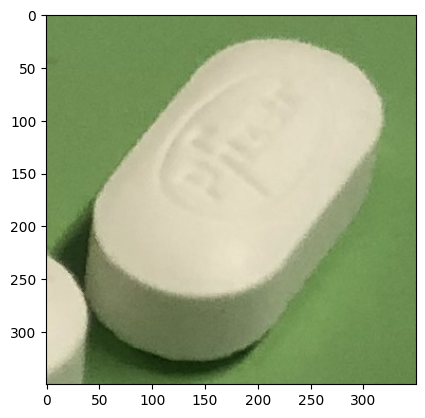

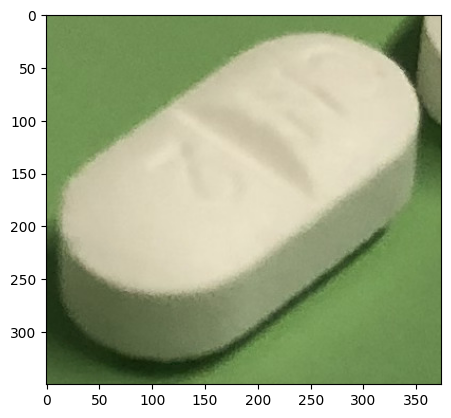

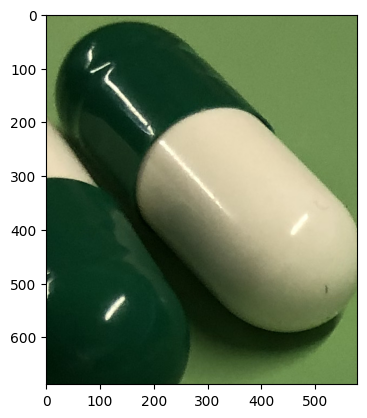

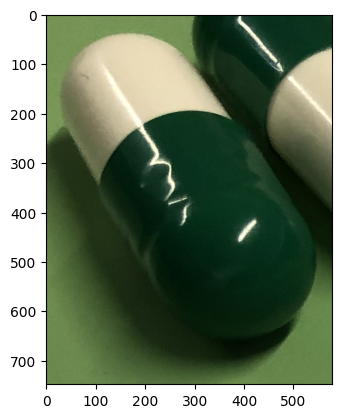

In [1]:
from get_data import get_data_pill

public_train_path = "../data/public_train/"
result =  get_data_pill("VAIPE_P_1159_30.jpg" , public_train_path)
# visualize all image 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import cv2
import json
for i in range(len(result)):
    fig, ax = plt.subplots(1)
    ax.imshow(result[i]["pill_image"])
    plt.show()

In [2]:
from get_data_pill import  Pill_Dataset 
# test Pill_Dataset
public_train_path = "/workspace/nabang1010/LBA_VAIPE/GNN/Multi_Label_Image_Recognition_with_Graph_Convolutional_Networks/data/public_train"
pill_dataset = Pill_Dataset(public_train_path, mode = "train")


pill_json_path:_______________________  /workspace/nabang1010/LBA_VAIPE/GNN/Multi_Label_Image_Recognition_with_Graph_Convolutional_Networks/data/public_train/pill/label/VAIPE_P_319_3.json


AttributeError: 'tuple' object has no attribute 'shape'

In [4]:
a = pill_dataset[0][0]

pill_json_path:_______________________  /workspace/nabang1010/LBA_VAIPE/GNN/Multi_Label_Image_Recognition_with_Graph_Convolutional_Networks/data/public_train/pill/label/VAIPE_P_319_3.json


In [6]:
pill_dataset[0][1]

pill_json_path:_______________________  /workspace/nabang1010/LBA_VAIPE/GNN/Multi_Label_Image_Recognition_with_Graph_Convolutional_Networks/data/public_train/pill/label/VAIPE_P_319_3.json


tensor([107, 107, 107, 107])